In [7]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [57]:
df_being_normalized = ""

# stressng-stream is in MB/s
# redisbench is in ops/s (with each op being 8 bytes)
def get_mbps(row):
    if row['benchmark'] == 'stressng-stream':
        return row['result'] / (1024 * 1024)
    else:
        return (row['result'] * 8) / (1024 * 1024)
    
def get_slowdown(row):
    base = df_being_normalized.query('benchmark == "stressng-stream" and machine == "' + row['machine'] + '"')['mbps']
    return 1 / (row['mbps'] / float(base))

def normalize(data):
    global df_being_normalized
    df_being_normalized = data
    data['mbps'] = data.apply(get_mbps, axis=1)
    data['slowdown'] = data.apply(get_slowdown, axis=1)

In [58]:
df_without = pd.read_csv('redis_without/all.csv')
normalize(df_without)
df_without['limits'] = 'no'

In [59]:
df_with = pd.read_csv('redis_limited/all.csv')
normalize(df_with)
df_with['limits'] = 'yes'

In [60]:
df = df_with.append([df_without])

In [61]:
df.columns

Index(['benchmark', 'machine', 'op', 'result', 'mbps', 'slowdown', 'limits'], dtype='object')

In [62]:
df

,benchmark,machine,op,result,mbps,slowdown,limits
0,stressng-stream,dwill.soe.ucsc.edu,raw,5.631954e+09,5371.050000,1.000000,yes
1,stressng-stream,rackform2,raw,2.661852e+09,2538.540000,1.000000,yes
2,stressng-stream,scruffy.soe.ucsc.edu,raw,3.739086e+09,3565.870000,1.000000,yes
3,stressng-stream,pl2,raw,3.363979e+09,3208.140000,1.000000,yes
4,redisbench,dwill.soe.ucsc.edu,SET,1.885725e+05,1.438694,3733.281712,yes
5,redisbench,dwill.soe.ucsc.edu,GET,1.830999e+05,1.396941,3844.864702,yes
6,redisbench,dwill.soe.ucsc.edu,LPUSH,1.998202e+05,1.524507,3523.139159,yes
7,redisbench,dwill.soe.ucsc.edu,LPOP,1.982947e+05,1.512868,3550.243187,yes
8,redisbench,rackform2,SET,9.673051e+04,0.737995,3439.778358,yes
9,redisbench,rackform2,GET,9.085540e+04,0.693172,3662.209565,yes


We run the [redis benchmark](https://redis.io/topics/benchmarks) (show results for `SET` operation) and we show results for multiple machines.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

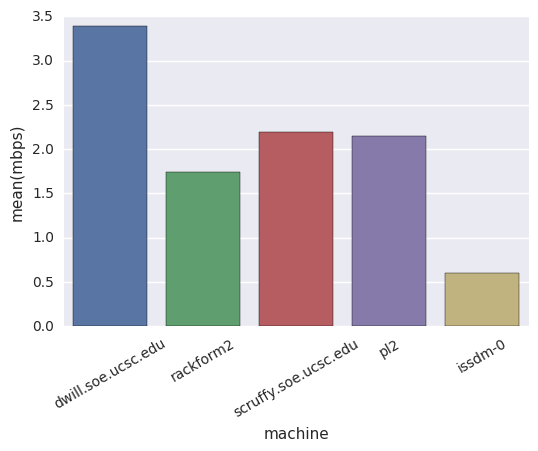

In [78]:
sns.barplot(x='machine', y='mbps', data=df.query('limits == "no" and op == "SET"'))
plt.xticks(rotation=30)

The problem with the above is that these are absolute numbers, and therefore they are missing a context. One way of providing one is to obtain raw memory bandwidth throughput and use it as a baseline (normalize the above w.r.t. raw bandwidth).

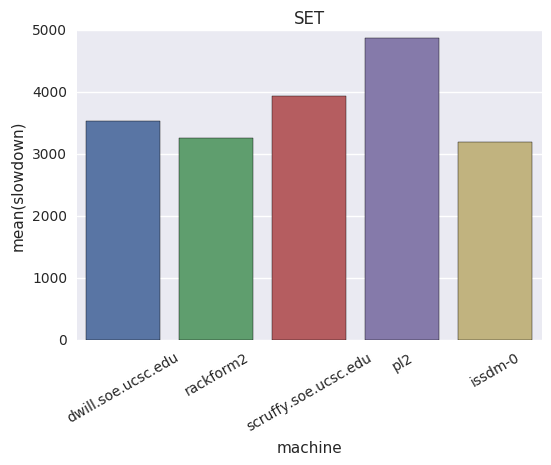

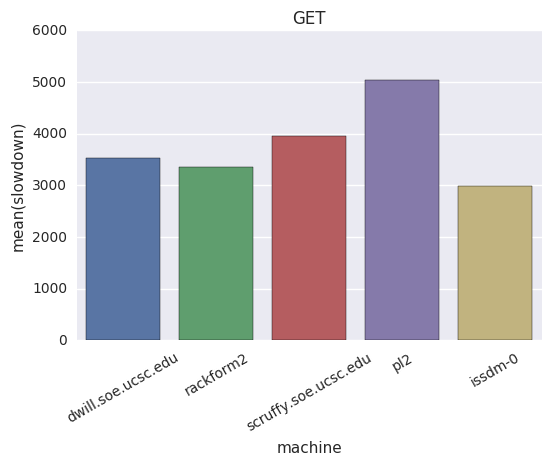

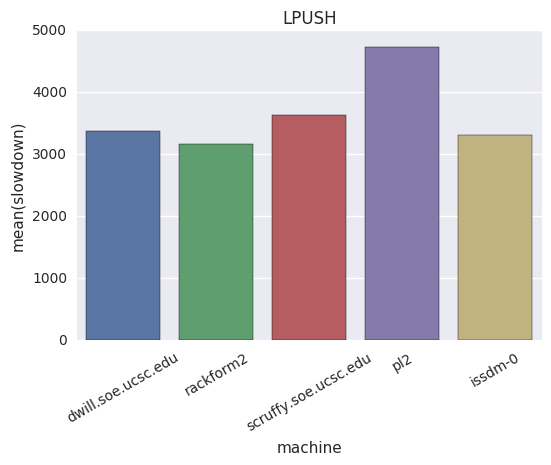

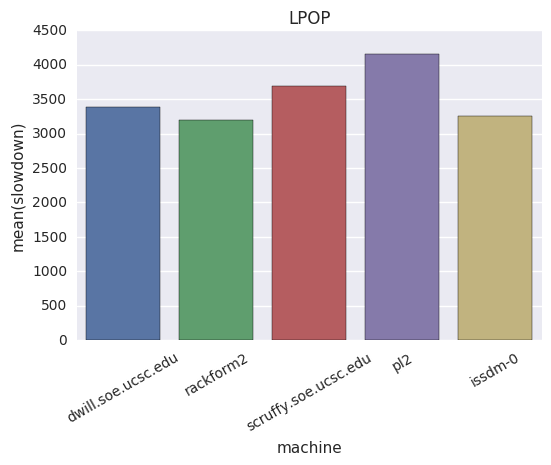

In [79]:
for b in df['op'].unique():
    if b == 'raw':
        continue
    sns.barplot(x='machine', y='slowdown', data=df.query('limits == "no" and op == "' + b + '"'))
    plt.xticks(rotation=30)
    sns.plt.title(b)
    plt.show()

The above shows the overhead (slowdown) of redis w.r.t. the raw memory bandwidth. The above makes much more sense: in the first graph we are comparing the same workload on disctinct machines, i.e. we are comparing machines. But this hypothetical experiment was evaluating the performance of the KV store!

So, in the first graph, what we can conclude is that "redis is significantly slower on `issdm-0`". After we normalize, then this is not the case, actually, the overhead of redis on `issdm-0` is the lowest! Also, our focus moves from comparing hardware to talking about the overhead of redis _overall across machines_ (which is the goal of the experiment). In this case, the claim we can make is that redis' overhead is 3-5k over the system memory bandwidth.

Now, would throttling help in this case? Let's see

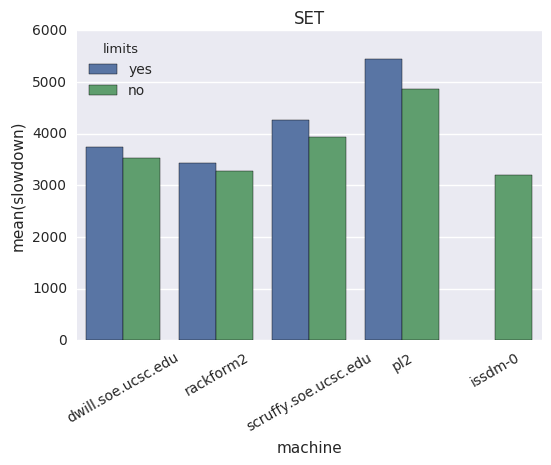

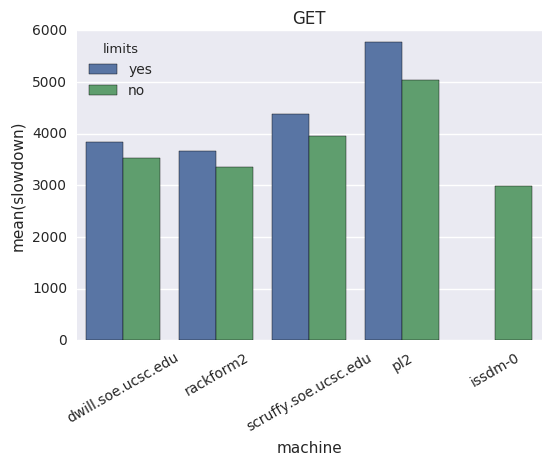

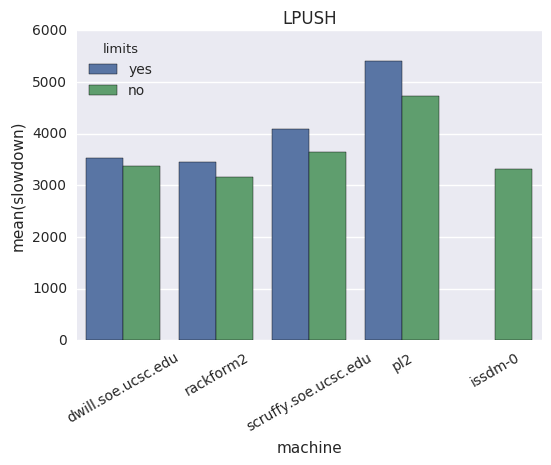

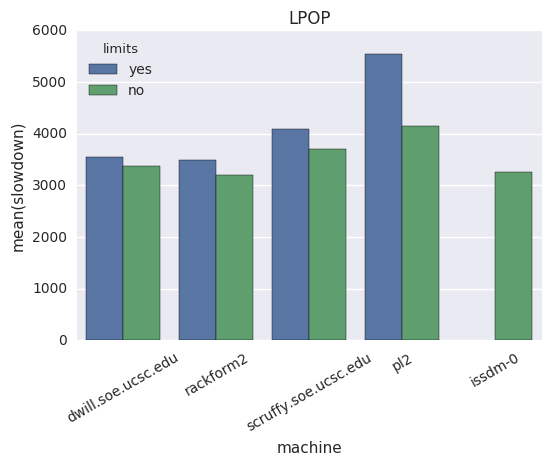

In [80]:
for b in df['op'].unique():
    if b == 'raw':
        continue
    sns.barplot(x='machine', y='slowdown', hue='limits', data=df.query('op == "' + b + '"'))
    plt.xticks(rotation=30)
    sns.plt.title(b)
    plt.show()

Since we are throttling _both_, the baseline and the KV store, we don't see any change in terms of the relationship between the overhead on distinct machines. **Open question**: are there any experiments where proper baselining does not help to contextualize results (i.e. where the 5k upper bound limit for the overhead would be, say, 100k)? Can throttling be used to "fix" these?